In [1]:
import pandas as pd 
import sklearn
import tensorflow 
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

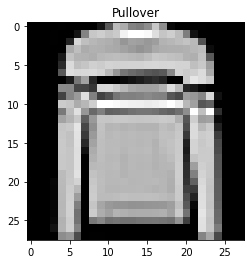

In [8]:
import matplotlib.pyplot as plt

class_labels = ["Tshirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# t, t, 

def showimage(image, label):
    plt.imshow(image, cmap="gray") # imshow
    plt.title(class_labels[label]) 
    plt.show()
    
showimage(train_images[5],train_labels[5])

In [9]:
train_images = train_images / 255
test_images = test_images / 255

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential(layers=[
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), # Input shape 
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') # Softmax
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # Loss

D:\Anaconda\envs\pytorch\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [11]:
history = model.fit(train_images, train_labels, epochs=8, validation_split=0.1)

Epoch 1/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7415 - loss: 0.7057 - val_accuracy: 0.8685 - val_loss: 0.3620
Epoch 2/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8746 - loss: 0.3460 - val_accuracy: 0.8678 - val_loss: 0.3557
Epoch 3/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8943 - loss: 0.2910 - val_accuracy: 0.8937 - val_loss: 0.2819
Epoch 4/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9059 - loss: 0.2562 - val_accuracy: 0.9040 - val_loss: 0.2616
Epoch 5/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9140 - loss: 0.2336 - val_accuracy: 0.9060 - val_loss: 0.2575
Epoch 6/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9248 - loss: 0.2067 - val_accuracy: 0.9103 - val_loss: 0.2626
Epoch 7/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9313 - loss: 0.1883 - val_accuracy: 0.9047 - val_loss: 0.2677
Epoch 8/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9364 - loss: 0.1740 - 

In [13]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9079 - loss: 0.2857


[0.27442654967308044, 0.9089999794960022]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


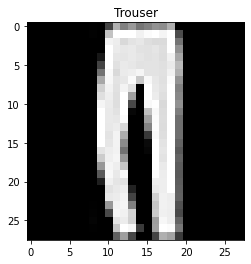

In [19]:
import numpy as np
pred = model.predict(test_images[2].reshape(1,28,28,1))
label = np.argmax(pred)
showimage(test_images[2],label)